# Taxi-v3: Brute-Force Algorithm
The following notebook solves the taxi-v3 environement from the OpenAI gym library, using a brute-force method.

In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
env = gym.make("Taxi-v3").env
env.reset()

54

In [3]:
# RESULTS
rewards_per_ep_total = []
steps_per_ep_total = []
penalties_per_ep_total = []

In [4]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def show_run_stats():
    # Rewards over episodes
    plt.figure(figsize=(12,5))
    plt.title("Rewards over epsides")
    plt.bar(torch.arange(len(rewards_per_ep_total)), rewards_per_ep_total, alpha=0.6, color='green', width=5)
    ma = moving_average(rewards_per_ep_total, n=15)
    plt.plot(torch.arange(len(ma)), ma)
    # plt.plot()
    plt.show()

    plt.figure(figsize=(12,5))
    plt.title("Steps over episodes")
    # plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
    plt.bar(torch.arange(len(steps_per_ep_total)), steps_per_ep_total)
    plt.show()

    plt.figure(figsize=(12,5))
    plt.title("Penalties over episodes")
    plt.plot(torch.arange(len(penalties_per_ep_total)), penalties_per_ep_total)
    plt.show()


In [5]:
def brute_force(episodes):

    for episode in range(episodes):
        state = env.reset()
        steps = 0
        done = False
        total_rewards = 0
        total_penalties = 0

        while not done:
            action = env.action_space.sample()
            state, reward, done, _ = env.step(action)

            total_rewards += reward
            steps += 1

            if reward == -10: # for wrong pickup/dropoffs
                total_penalties += 1

        steps_per_ep_total.append(steps)
        rewards_per_ep_total.append(total_rewards)
        penalties_per_ep_total.append(total_penalties)


    print("Bruteforcing taxi-v3...")
    print("Starting State: " + str(env.s) + "\n")
    print("Total Steps to Completion: " + str(steps))
    print("Penalties (Incorrect dropoff/pickup): " + str(total_penalties))
    show_run_stats()

Bruteforcing taxi-v3...
Starting State: 475

Total Steps to Completion: 1828
Penalties (Incorrect dropoff/pickup): 581


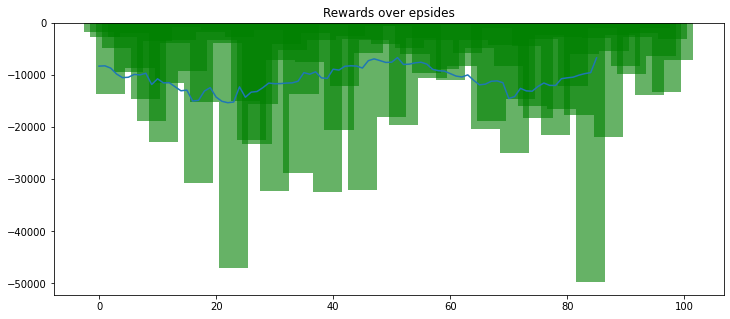

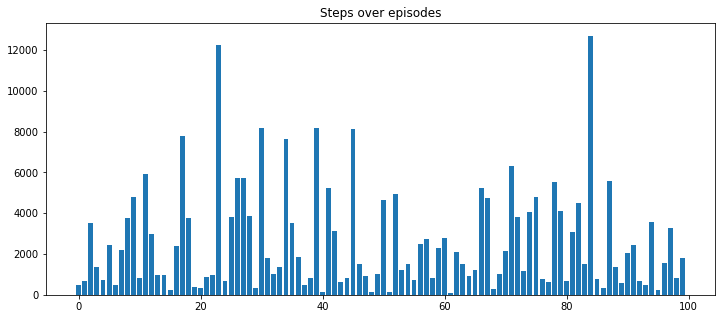

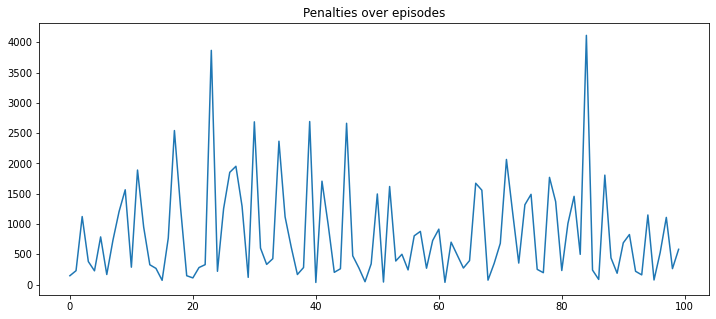

In [6]:
brute_force(100)